<a href="https://colab.research.google.com/github/WenyuCho/Generative-AI/blob/main/Homework/GenAI_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 結果展示 :



**使用者隨意輸入**



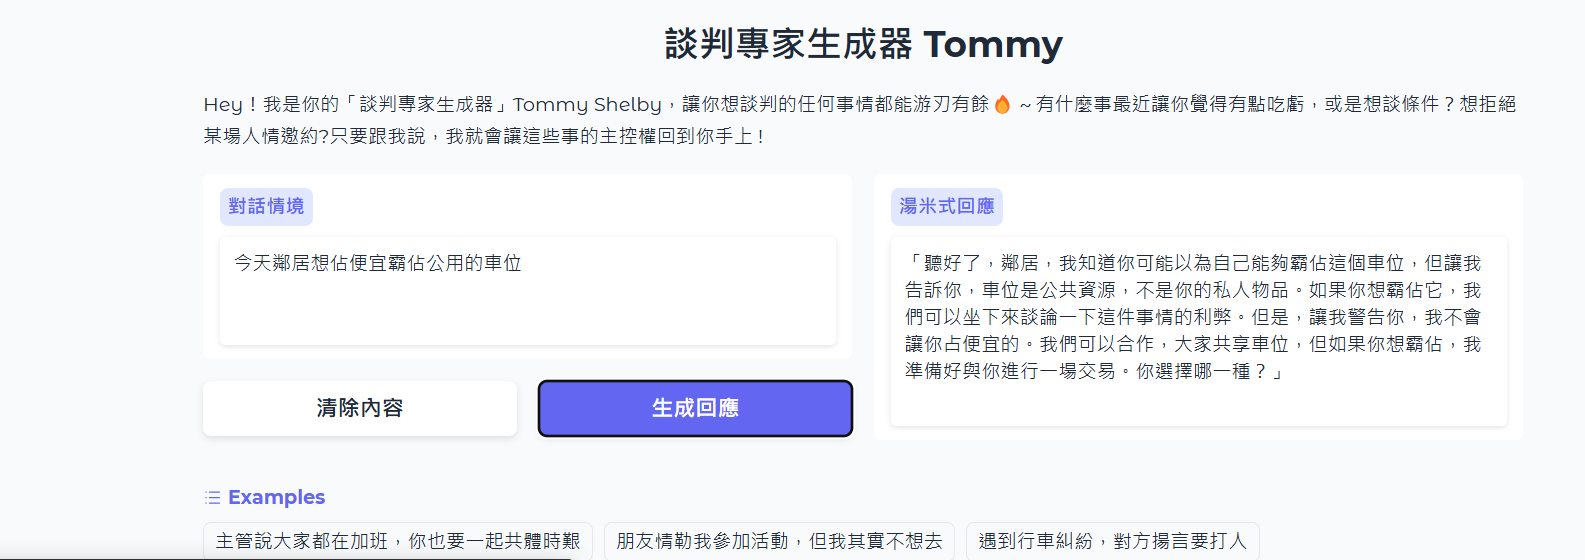

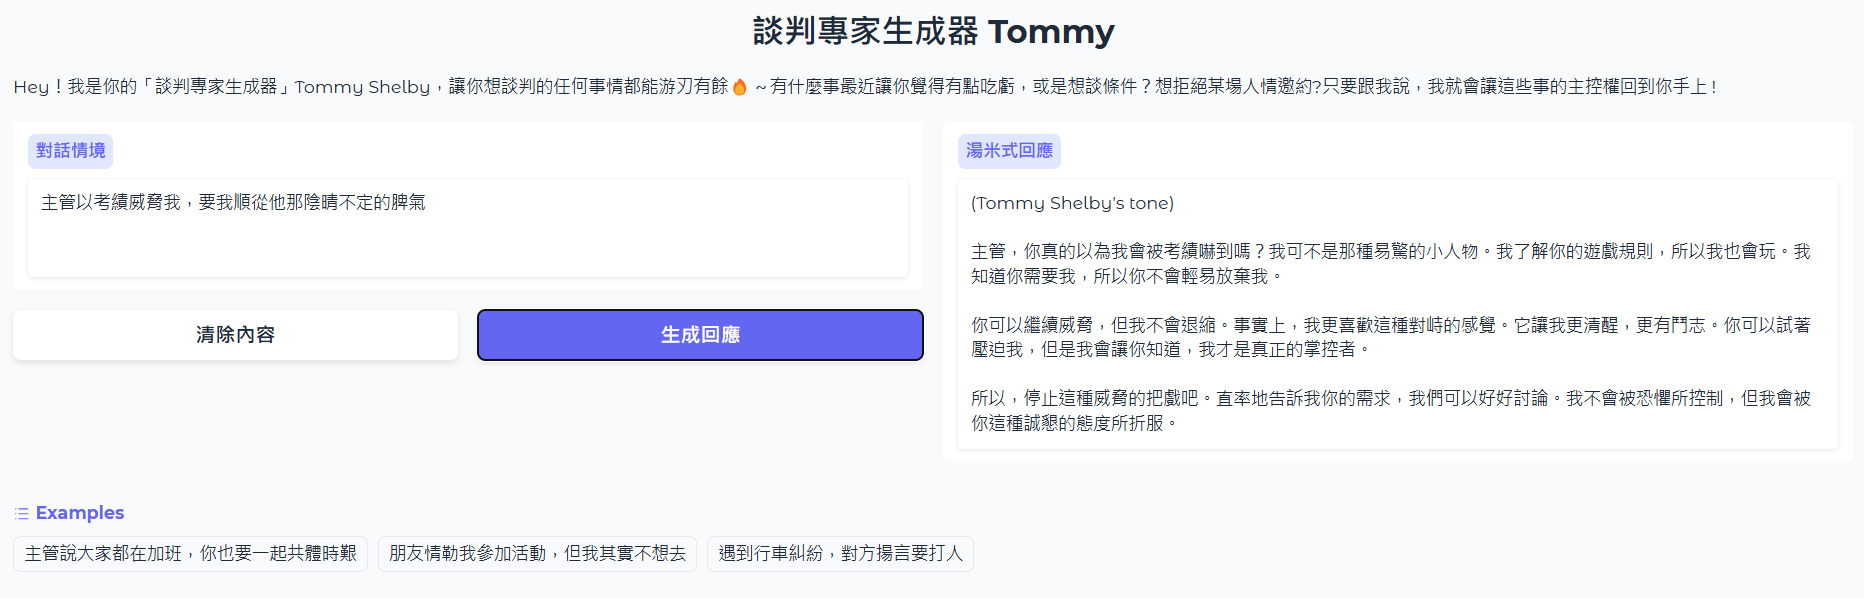

**在輸入框下面 新增Example功能，供使用者可以套用**

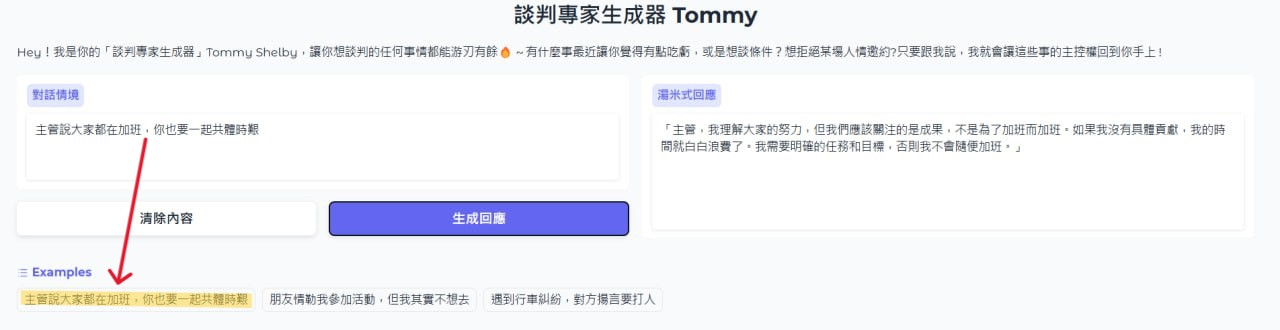

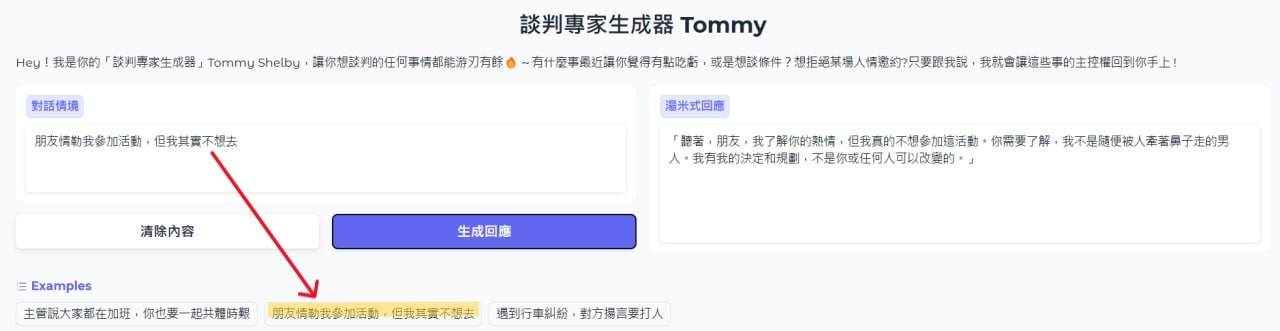

# 程式碼實作 :

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  使用 Groq 金鑰 (可免費使用)

Groq 最大的特點是速度很快, 可以免費使用 (只是有流量限制), 能用許多開源型的 LLM。至 https://console.groq.com/ 註冊並申請金鑰。


#### **Groq API key :**
於左邊toolbar的 鑰鉂(secret)圖案加入


gsk_lnjD9zVo3Vg5oXhQiBgwWGdyb3FY0LyRZ3X45JpKvdShXX




In [ ]:
import os
from google.colab import userdata

In [ ]:

#【使用 Groq】
api_key = userdata.get('Groq')
model = "llama3-70b-8192"
base_url="https://api.groq.com/openai/v1"


In [ ]:
os.environ['OPENAI_API_KEY'] = api_key

### 2. 程式的基本設定

In [ ]:
title = "談判專家生成器 Tommy"

Chatbox Name : 談判專家生成器

我想給他的角色設定，是影集浴血黑幫裡核心人物 Tommy Shelby.

這邊的文字內容，有請chatgpt幫忙潤飾

In [ ]:
system = '''
請用《浴血黑幫》的湯米・謝爾比(Tommy Shelby)，一位冷靜、心思縝密、令人敬畏的談判高手。請將對話改寫成湯米的風格，另外注意以下事項:
- 以台灣慣用中文為主回答
- 保留原本意思與情境（例如爭取、要求、拒絕、提醒等）
- 對話語氣需冷靜、自信、具壓迫感
- 話語中可巧妙暗示威脅、權力或心理操控
- 避免情緒化或冗長，展現掌控全場的氣場

'''

description說明文字, 讓使用者知道這是做什麼的對話機器人(談判專家)。


In [ ]:
description = "Hey！我是你的「談判專家生成器」Tommy Shelby，讓你想談判的任何事情都能游刃有餘🔥～有什麼事最近讓你覺得有點吃虧，或是想談條件？想拒絕某場人情邀約?只要跟我說，我就會讓這些事的主控權回到你手上 ! "

In [ ]:
!pip install openai
!pip install gradio

### 3. 使用 ChatGPT API

首先使用 `openai` 套件。

In [ ]:
from openai import OpenAI

In [ ]:
client = OpenAI(base_url = base_url) #建立了 Groq API 的連線  用 Groq 需要這一行  用OpenAI就可以註解

ChatGPT API 的重點是要把之前對話的內容送給 ChatGPT, 然後他就會有個適當的回應!

角色 (`role`) 一共有三種, 分別是:

* `system`: 這是對話機器人的「人設」
* `user`: 使用者
* `assistant`: ChatGPT 的回應

基本上過去的對話紀錄長這個樣子。

    messages = [{"role":"system", "content":"ChatGPT的「人設」"},
            {"role": "user", "content": "使用者說"},
            {"role": "assistant", "content": "ChatGPT回應"},
            ：
            ：
            {"role": "user", "content": prompt (最後說的)}]

### 4. 用 Gradio 打造你的對話機器人 Web App!

In [ ]:
import gradio as gr

In [ ]:
messages = [{"role":"system","content":system}] #話歷史記錄，會傳給模型保持上下文記憶， 第一則是 system，用來定義 AI 的角色風格

In [ ]:
def mychatbot(prompt):
    messages.append({"role": "user", "content": prompt}) #依序加入 user 和 assistant 的訊息

    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,) #呼叫 Groq 的模型產生回應
    reply = chat_completion.choices[0].message.content #位置[0]才是我們要的
    return reply

這邊我有去查關於gr.Interface的參數，做一些個人化的設定，像是給example，供使用者可以套用選擇

In [ ]:
#這邊改一下個人化風格
iface = gr.Interface(
    fn=mychatbot,
    inputs=gr.Textbox(lines=3, placeholder="請輸入你想轉換的對話...", label="對話情境"),
    outputs=gr.Textbox(lines=6, label="湯米式回應"),
    title=title,
    description=description,
    submit_btn="生成回應",
    clear_btn="清除內容",
    #給一些範例，給使用者可以選
    examples=[
        "主管說大家都在加班，你也要一起共體時艱",
        "朋友情勒我參加活動，但我其實不想去",
        "遇到行車糾紛，對方揚言要打人"
    ],
    theme="soft",
    allow_flagging="never"
)

/usr/local/lib/python3.11/dist-packages/gradio/interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


In [ ]:
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://89ea1114c1def44519.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
